# Project 2: Wrangle and Analyze Data

By Ganiyat Issa-Onilu

## Table of Contents
<ul>
    <li><a href="#introduction">Introduction</a></li>
    <li><a href="#gathering">Gathering Data</a></li>
    <li><a href="#assessing">Assessing Data</a></li>
    <li><a href="#issues">Documented issues</a></li>
    <li><a href="#cleaning">Cleaning Data</a></li>
    <li><a href="#storing">Storing Data</a></li>
    <li><a href="#analysing">Analysing and Visualising Data</a></li>
    <li><a href="#references">References</a></li>

</ul>

<a id="introduction"></a>
## Introduction
> In this project, I will be wrangling and analyzing datasets from <a href="https://en.wikipedia.org/wiki/WeRateDogs">WeRateDogs</a> Twitter profile. This involves gathering three datasets (via manual download, programmatic download and twitter API), assessing the datasets for quality and tidiness issues and cleaning the datasets to remove the issues identified. Thereafter, I will store the datasets as a cleaned master data frame, analyse to discover insights and then visualize the insights.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import json
import tweepy
import requests
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce
from tweepy import OAuthHandler
from timeit import default_timer as timer

<a id="gathering"></a>
## Gathering Data
>**The datasets used in this project are:**<br>
    a. The twitter archives `twitter-archive-enhanced.csv` data which will be manually downloaded from the classroom.<br>
    b. The tweet image predictions `image_predictions.tsv` data which will be downloaded programmatically via a url.<br>
    c. The `tweet-json.txt` for the retweet count and favorite count (accessible via Twitter API).<br>
    
>**Note:** The `tweet-json.txt`data will also be manually downloaded due to challenges extracting via Twitter API.

1. Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)

In [2]:
#load the downloaded twitter archive dataset
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (`image_predictions.tsv`)

In [3]:
#direct download of the image predictions data using the url provided in the classroom
img_preds_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_preds = requests.get(img_preds_url)

#check status of the download, it returns 200 if successfull
img_preds.status_code

200

In [4]:
#open a new tsv file and write the content of the downloaded data
with open('image-predictions.tsv','wb') as file:
    file.write(img_preds.content)

In [5]:
#load the image prediction data
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Read the manually downloaded `tweet-json.txt` file to a dictionary and import into a pandas dataframe

In [6]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [7]:
#Extracting retweet data like retweet count and favorite count and then importing it into a pandas DataFrame
tweet_data = []

with open('tweet-json.txt', encoding='utf-8') as f:
    for line in f.readlines():
        tweet_line = json.loads(line)
        tweet_id = tweet_line['id']
        retweet_count = tweet_line['retweet_count']
        favorite_count = tweet_line['favorite_count']
        tweet_data.append({'tweet_id': tweet_id,
                           'retweet_count': retweet_count,
                           'favorite_count': favorite_count,
                           'followers_count': tweet_line['user']['followers_count']})
tweet_counts = pd.DataFrame(tweet_data, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])
tweet_counts.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


<a id="assessing"></a>
## Assessing Data
> In this section, the three datasets will be assessed for quality and tidiness issues. The identified issues will be documented.
I will be assessing only original ratings (no retweets) that have images. Hence i will filter the data based on this condition before assessing it.

#### a. Assess Twitter archive data

In [8]:
#get 5 samples of the twitter archive data
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
598,798686750113755136,NaN,NaN,2016-11-16 00:38:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Say hello to Jack (pronounced ""...",6.833919e+17,4.196984e+09,2016-01-02 20:58:09 +0000,https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None,None,None,None
2187,668979806671884288,NaN,NaN,2015-11-24 02:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chaz. He's an X Games half pipe supers...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668979806...,12,10,Chaz,None,None,None,None
2165,669367896104181761,NaN,NaN,2015-11-25 04:11:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. Chip's pretending to be choked. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669367896...,10,10,Chip,None,None,None,None
1709,680609293079592961,NaN,NaN,2015-12-26 04:41:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. That is his chair. He loves his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680609293...,9,10,Brody,None,None,None,None


In [9]:
#view entries that are retweets (not original tweets)
twitter_archive[~twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [10]:
#view entries that are replies to tweets
twitter_archive[~twitter_archive['in_reply_to_user_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [11]:
#select only the tweets that are original ratings, no retweets
twitter_archive1 = twitter_archive[twitter_archive['retweeted_status_id'].isnull()]
twitter_archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [12]:
#remove tweet replies from the original tweets to use only original ratings from @dog_rates twitter account
twitter_archive_original = twitter_archive1[twitter_archive1['in_reply_to_user_id'].isnull()]
twitter_archive_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [13]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#get a list of tweet ids and images
tweet_images = img_predictions[['tweet_id', 'jpg_url']]
tweet_images.sample(3)

,tweet_id,jpg_url
472,675145476954566656,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg
729,686606069955735556,https://pbs.twimg.com/media/CYdQktMWsAEI29_.jpg


In [15]:
#create a list of tweet ids that have images
tweet_ids = tweet_images['tweet_id'].unique().tolist()

#select only the original ratings that have images
twitter_archive_original = twitter_archive_original.loc[twitter_archive_original['tweet_id'].isin(tweet_ids)]
twitter_archive_original.shape

(1971, 17)

> Based on the condition stated for assessing data, only entries that are original ratings (no retweets) and have images will be used for the remaining section of this notebook. 

> **Note:** There are 1971 entries (original ratings) that have images

In [16]:
#check metadata of the new dataset to be assess 
twitter_archive_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

In [17]:
#check percentage of missing values in all columns 
missing_values_perc = (twitter_archive_original.isnull().sum()/len(twitter_archive_original))*100
missing_values_perc.sort_values(ascending=False)

retweeted_status_timestamp    100.0
in_reply_to_user_id           100.0
retweeted_status_id           100.0
retweeted_status_user_id      100.0
in_reply_to_status_id         100.0
rating_denominator              0.0
pupper                          0.0
floofer                         0.0
doggo                           0.0
name                            0.0
tweet_id                        0.0
rating_numerator                0.0
expanded_urls                   0.0
text                            0.0
source                          0.0
timestamp                       0.0
puppo                           0.0
dtype: float64

In [18]:
#check if the entries have more than one dog type
#convert the values of the dog type columns to 0 if it is 'None' else 1
dog_type = ['doggo', 'floofer', 'pupper', 'puppo']

for dog in dog_type:
    twitter_archive_original[dog] = twitter_archive_original[dog].apply(lambda x: 0 if x == 'None' else 1)

#create a new column (number_of_categories) that sums up the values of four columns
twitter_archive_original['number_of_categories'] = twitter_archive_original.loc[:,dog_type].sum(axis = 1)

In [19]:
#retrieve the counts of the 'number of categories' column
twitter_archive_original['number_of_categories'].value_counts()

0    1668
1     293
2      10
Name: number_of_categories, dtype: int64

In [20]:
#retrieve the top three rows
twitter_archive_original.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_of_categories
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,0,0


In [21]:
#get the number of duplicate tweet ids in the data
sum(twitter_archive_original['tweet_id'].duplicated())

0

In [22]:
#check for number of unique tweet ids
twitter_archive_original['tweet_id'].nunique()

1971

In [23]:
#check for number of unique rating_denominator values
twitter_archive_original['rating_denominator'].nunique()

14

In [24]:
#create a subset that contains ratings having a denominator greater or lower than 10
ratings_subset = twitter_archive_original[twitter_archive_original['rating_denominator'].values != 10]

In [25]:
#number of entries with rating_denominator greater or lower than 10
len(ratings_subset)

17

In [26]:
#get the counts of distinct sources in the data
twitter_archive_original['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [27]:
#retreive the list of unique dog names in the data
twitter_archive_original['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [28]:
#retrieve the list of unique dog names in the ratings_subset data
ratings_subset['name'].unique()

array(['None', 'Sam', 'this', 'Bluebert', 'a', 'Darrel', 'an'],
      dtype=object)

#### b. Assess image prediction data

In [29]:
#assess 10 samples of the image prediction data
img_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
288,671159727754231808,https://pbs.twimg.com/media/CVBwNjVWwAAlUFQ.jpg,1,pitcher,0.117446,False,sunglasses,0.062487,False,mask,0.059517,False
1370,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/76203...,1,home_theater,0.063152,False,cash_machine,0.046692,False,theater_curtain,0.046277,False
120,668190681446379520,https://pbs.twimg.com/media/CUXj4SgXAAETlu6.jpg,1,Blenheim_spaniel,0.958402,True,cocker_spaniel,0.026764,True,Welsh_springer_spaniel,0.007790,True
1575,796031486298386433,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False
1557,793226087023144960,https://pbs.twimg.com/media/CwIa5CjW8AErZgL.jpg,1,wire-haired_fox_terrier,0.456047,True,Lakeland_terrier,0.273428,True,English_springer,0.083643,True
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1477,780543529827336192,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,1,golden_retriever,0.628312,True,Labrador_retriever,0.317365,True,Tibetan_mastiff,0.012260,True
252,670717338665226240,https://pbs.twimg.com/media/CU7d2vKUcAAFZyI.jpg,1,Pomeranian,0.368161,True,Pekinese,0.350973,True,golden_retriever,0.114902,True
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,West_Highland_white_terrier,0.918144,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True
1411,770772759874076672,https://pbs.twimg.com/media/CrJVupHXgAA4Dkk.jpg,1,chow,0.979515,True,golden_retriever,0.010219,True,Pomeranian,0.004606,True


In [30]:
#metadata of the data
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
#number of duplicates in the data
sum(img_predictions.duplicated())

0

In [32]:
#show the number of duplicate entries
duplicate_entries = img_predictions[img_predictions.duplicated()]
duplicate_entries

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
#check if there are duplicate image urls in the data
sum(img_predictions['jpg_url'].duplicated())

66

In [34]:
#retrieve the number of entries with duplicate image urls
img_predictions[img_predictions['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [35]:
#count distinct img_num values
img_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### c. Assess retweet counts data

In [36]:
#show 10 samples in the tweet_counts data
tweet_counts.sample(10)

,tweet_id,retweet_count,favorite_count,followers_count
432,820690176645140481,3716,13518,3200894
505,812747805718642688,8067,0,3200895
1949,673686845050527744,479,1544,3201004
1831,676146341966438401,744,2077,3201002
1260,710140971284037632,1008,3017,3200947
1284,708400866336894977,11330,17516,3200947
1846,675798442703122432,3787,11101,3201002
1790,677334615166730240,328,1477,3200953
124,868622495443632128,6275,28295,3200891
988,748705597323898880,1067,3047,3200943


In [37]:
#show metadata of the data
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


<a id="issues"></a>
### Documented issues

#### Quality issues

1. The **source** column contains redundant values ('anchor' html tags) attached to the tweets' sources.

2. The **timestamp** column has a wrong datatype (object). It should be datetime datatype.

3. Column names are non-descriptive hence do no provide context for the image prediction data.

4. There are duplicate images in the image predictions.

5. Wrong data type (i.e. integer) for **tweet_id** columns.

6. There are some unnecessary columns (with 100% missing values) in the twitter archive dataset.

7. Dog breed names in the image predictions data are in lower cases and have underscores.

8. Some tweet entries have more than one dog stage (i.e. doggo, puppo, pupper and floofer)

#### Tidiness issues
1. The retweets are on the same table as the original tweets. 

2. The dog classification (doggo, puppo, pupper and floofer) are on separate columns 

<a id="cleaning"></a>
## Cleaning Data
> I will be using the Define-Code-Test framework to clean data quality and tidiness issues identified while visually and programatically assessing the three datasets. The framework involves defining the steps to clean the data based on identified issues, writing codes to clean the data and testing to check if these issues have been resolved. 

In [38]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive_original.copy()
image_preds_copy = img_predictions.copy()
tweet_counts_copy = tweet_counts.copy()

### Issue #1: 

#### Define:
-  Extract the tweet sources from the 'anchor' html tags.

#### Code

In [39]:
#extract sources from anchor html tags and codes
twitter_archive_copy.source = twitter_archive_copy.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [40]:
#check data if source column is clean
twitter_archive_copy.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [41]:
#display length of the twitter archive copy
len(twitter_archive_copy)

1971

### Issue #2:

#### Define
- Convert **timestamp** to datetime datatype

#### Code

In [42]:
#convert the timestamp column to datetime datatype
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy.timestamp)

#### Test

In [43]:
#check if the datatype for timestamp is datetime
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1971 non-null   int64           

### Issue #3:

#### Define
- Rename the non-descriptive column names in the image prediction data

#### Code

In [44]:
#get the columns in the image prediction data
image_preds_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [45]:
#rename all the columns to descriptive names 
image_preds_copy.columns = ['tweet_id', 'image_url', 'image_number', '1st_pred', '1st_pred_conf', '1st_pred_is_dog', '2nd_pred',
       '2nd_pred_conf', '2nd_pred_is_dog', '3rd_pred', '3rd_pred_conf', '3rd_pred_is_dog']

#### Test

In [46]:
#check if the renaming of columns in the data worked
image_preds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   int64  
 1   image_url        2075 non-null   object 
 2   image_number     2075 non-null   int64  
 3   1st_pred         2075 non-null   object 
 4   1st_pred_conf    2075 non-null   float64
 5   1st_pred_is_dog  2075 non-null   bool   
 6   2nd_pred         2075 non-null   object 
 7   2nd_pred_conf    2075 non-null   float64
 8   2nd_pred_is_dog  2075 non-null   bool   
 9   3rd_pred         2075 non-null   object 
 10  3rd_pred_conf    2075 non-null   float64
 11  3rd_pred_is_dog  2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #4:

#### Define
- Drop the duplicate images in the image prediction data

#### Code

In [47]:
#retrieve 5 samples of the data
image_preds_copy.sample(5)

,tweet_id,image_url,image_number,1st_pred,1st_pred_conf,1st_pred_is_dog,2nd_pred,2nd_pred_conf,2nd_pred_is_dog,3rd_pred,3rd_pred_conf,3rd_pred_is_dog
1169,736010884653420544,https://pbs.twimg.com/media/CjbV-lEWgAAr6WY.jpg,2,golden_retriever,0.553901,True,Labrador_retriever,0.119475,True,bluetick,0.077475,True
1456,777641927919427584,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
1233,746131877086527488,https://pbs.twimg.com/media/ClrK-rGWAAENcAa.jpg,1,chow,0.575637,True,Pomeranian,0.195950,True,Norwich_terrier,0.141224,True
1585,797545162159308800,https://pbs.twimg.com/media/CxFzFAAUAAA5C9z.jpg,1,Pembroke,0.954089,True,Cardigan,0.033644,True,papillon,0.009736,True
299,671486386088865792,https://pbs.twimg.com/media/CVGZTboUsAATohd.jpg,1,German_shepherd,0.827035,True,kelpie,0.087648,True,red_wolf,0.031218,False


In [48]:
#get the number of duplicate image urls
image_preds_copy['image_url'].duplicated().sum()

66

In [49]:
#drop duplicate images urls in the data
image_preds_copy.drop_duplicates(subset=['image_url'], keep='last',inplace=True)

#### Test

In [50]:
#check if the data contains duplicate image urls
image_preds_copy['image_url'].duplicated().sum()

0

### Issue #5:

#### Define
- Convert **tweet_id** column in the three datasets to string datatype

#### Code

In [51]:
#convert the tweet_id column in the three datasets from integer to string datatype
twitter_archive_copy.tweet_id = twitter_archive_copy.tweet_id.astype(str)
image_preds_copy.tweet_id = image_preds_copy.tweet_id.astype(str)
tweet_counts_copy.tweet_id = tweet_counts_copy.tweet_id.astype(str)

#### Test

In [52]:
#print the datatype of tweet_id column in the three dataset
print("The datatype of 'tweet_id' column in the twitter archive data is",twitter_archive_copy['tweet_id'].dtype)
print("The datatype of 'tweet_id' column in the image prediction data is",image_preds_copy['tweet_id'].dtype)
print("The datatype of 'tweet_id' column in the twitter api data is",tweet_counts_copy['tweet_id'].dtype)

The datatype of 'tweet_id' column in the twitter archive data is object
The datatype of 'tweet_id' column in the image prediction data is object
The datatype of 'tweet_id' column in the twitter api data is object


### Issue #6:

#### Define
- Drop unnecessary columns in the twitter archive dataset.

#### Code

In [53]:
#drop unnecessary columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
#'retweeted_status_timestamp')
twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [54]:
#check if columns have been dropped
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'number_of_categories'],
      dtype='object')

### Issue #7:

#### Define
- Convert the dog breeds into title cases and replace underscores with whitespace.

#### Code

In [55]:
#convert the dog predictions into title case and replace underscore with whitespace
breed_preds = ['1st_pred', '2nd_pred', '3rd_pred']
for col in breed_preds:
    image_preds_copy[col] = image_preds_copy[col].replace('_',' ', regex=True).str.title()

#### Test

In [56]:
#check if the issue have been resolved
image_preds_copy[breed_preds].sample(5)

,1st_pred,2nd_pred,3rd_pred
675,Lakeland Terrier,Soft-Coated Wheaten Terrier,Golden Retriever
611,Pug,French Bulldog,Boston Bull
1552,Italian Greyhound,Bluetick,Standard Poodle
373,Lakeland Terrier,West Highland White Terrier,Wire-Haired Fox Terrier
612,Maltese Dog,West Highland White Terrier,Shih-Tzu


### Issue #8:

#### Define
- Re-extract accurate dog stage from the text of twitter archive entries

#### Code

In [57]:
# extract dog types from the text column
for index, column in twitter_archive_copy.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(twitter_archive_copy.loc[index, 'text']).lower():
            twitter_archive_copy.loc[index, 'dog_type'] = word.title()     

#### Test

In [58]:
#retrieve the counts of distinct dog_type values
twitter_archive_copy['dog_type'].value_counts()

Pupper     225
Doggo       78
Puppo       27
Floofer      8
Name: dog_type, dtype: int64

### Issue #9:

#### Define
- Extract the retweets in the twitter archive data on a separate table.

#### Code

In [59]:
#show the metadata of the original data extracted
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [60]:
#create a new dataframe for entries that are not original ratings from 'WeRateDogs'
twitter_sub1 = twitter_archive[~twitter_archive['retweeted_status_id'].isnull()]
twitter_sub2 = twitter_archive[~twitter_archive['in_reply_to_user_id'].isnull()]
retweets_data = pd.concat([twitter_sub1, twitter_sub2], ignore_index=True)

#### Test

In [61]:
#display first three rows
retweets_data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
1,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
2,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None


In [62]:
#show the metadata of the retweets dataframe
retweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    259 non-null    int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   259 non-null    object 
 4   source                      259 non-null    object 
 5   text                        259 non-null    object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               203 non-null    object 
 10  rating_numerator            259 non-null    int64  
 11  rating_denominator          259 non-null    int64  
 12  name                        259 non-null    object 
 13  doggo                       259 non

### Issue #10:

#### Define
- After re-extracting the dog stages for all entries on a new column (dog_type), drop the dog stage columns ('puppo', 'pupper', 'doggo', 'floofer') and any other unnecessary column(s).

#### Code

In [63]:
# drop the dog type columns
twitter_archive_copy.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer','number_of_categories'],
                      axis=1, inplace=True)

#### Test

In [64]:
#check if the dog type columns have been dropped
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_type'],
      dtype='object')

<a id="storing"></a>
## Storing Data
> Save gathered, assessed, and cleaned master dataset to a CSV file named `twitter-archive-master.csv`.

In [65]:
#Create a master dataframe by combining the three datasets based on the same tweet ids.
master_df = twitter_archive_copy.merge(image_preds_copy, how='left').merge(tweet_counts_copy, how='left')

In [66]:
#select 5 samples of the master dataframe
master_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,image_url,...,1st_pred_is_dog,2nd_pred,2nd_pred_conf,2nd_pred_is_dog,3rd_pred,3rd_pred_conf,3rd_pred_is_dog,retweet_count,favorite_count,followers_count
1038,704819833553219584,2016-03-02 00:05:17+00:00,Twitter for iPhone,This is Chesterson. He's a Bolivian Scoop Dog....,https://twitter.com/dog_rates/status/704819833...,7,10,Chesterson,NaN,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,...,False,Hamster,0.004069,False,Wood Rabbit,0.000206,False,1136,2906,3200948
1013,707014260413456384,2016-03-08 01:25:10+00:00,Twitter for iPhone,This is Ellie. She requests to be carried arou...,https://twitter.com/dog_rates/status/707014260...,11,10,Ellie,NaN,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,...,True,Italian Greyhound,0.129683,True,Toy Terrier,0.089153,True,664,2502,3200947
881,723688335806480385,2016-04-23 01:41:59+00:00,Twitter for iPhone,This is Reginald. He starts screaming at rando...,https://twitter.com/dog_rates/status/723688335...,12,10,Reginald,NaN,https://pbs.twimg.com/media/CgsOszGW0AAruKp.jpg,...,False,Chow,0.089010,True,Irish Terrier,0.065306,True,3347,8435,3200945
775,743510151680958465,2016-06-16 18:26:48+00:00,Twitter Web Client,"This is Beya. She doesn't want to swim, so she...",https://twitter.com/dog_rates/status/743510151...,13,10,Beya,NaN,https://pbs.twimg.com/ext_tw_video_thumb/74350...,...,False,Tub,0.020405,False,Hippopotamus,0.013095,False,4185,8671,3200943
256,831552930092285952,2017-02-14 17:17:22+00:00,Twitter for iPhone,This is Dutch. He dressed up as his favorite e...,https://twitter.com/dog_rates/status/831552930...,13,10,Dutch,NaN,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,...,True,Pembroke,0.161442,True,French Bulldog,0.092143,True,2632,9872,3200892


In [67]:
#display metadata
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_type            338 non-null    object             
 9   image_url           1905 non-null   object             
 10  image_number        1905 non-null   float64            
 11  1st_pred            1905 non-null   object             
 12  1st_pred_conf       1905 non-null 

In [68]:
# Store master data in a csv file
master_df.to_csv('twitter-archive-master.csv', index=False)

<a id="analysing"></a>
## Analysing and Visualising Data
> In this section, the master dataframe is analysed to derive insights. Some of the insights will be visualised in the form of charts.

In [69]:
#load the master csv file in a dataframe
twitter_archive_master = pd.read_csv('twitter-archive-master.csv')
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,image_url,...,1st_pred_is_dog,2nd_pred,2nd_pred_conf,2nd_pred_is_dog,3rd_pred,3rd_pred_conf,3rd_pred_is_dog,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9774,41048,3200889


In [70]:
#display metadata
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   dog_type            338 non-null    object 
 9   image_url           1905 non-null   object 
 10  image_number        1905 non-null   float64
 11  1st_pred            1905 non-null   object 
 12  1st_pred_conf       1905 non-null   float64
 13  1st_pred_is_dog     1905 non-null   object 
 14  2nd_pred            1905 non-null   object 
 15  2nd_pred_conf       1905 non-null   float64
 16  2nd_pr

In [71]:
#show the counts of distinct sources
tweet_sources = twitter_archive_master['source'].value_counts()
tweet_sources

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [72]:
#show the counts of distinct dog types
dog_types = twitter_archive_master['dog_type'].value_counts()
dog_types

Pupper     225
Doggo       78
Puppo       27
Floofer      8
Name: dog_type, dtype: int64

In [73]:
#calculate correlation between retweet_count and favorite_count
subset_master = twitter_archive_master[['retweet_count','favorite_count']]
subset_master.corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.913014
favorite_count,0.913014,1.000000


### Insights:
> 1. iPhone is the most used twitter source
2. Pupper is the most common dog stage
3. There is a strong positive relationship between retweet counts and favorite counts of tweets because the correlation score is 0.9 (close to 1).

### Visualization

In [74]:
#create a plot_chart function that plot charts to present the insights
def plot_chart(df, kind, title, xlabel, ylabel, rot=0):
    df.plot(kind=kind)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rot)
    plt.figure(figsize=(15,15))
    plt.show()

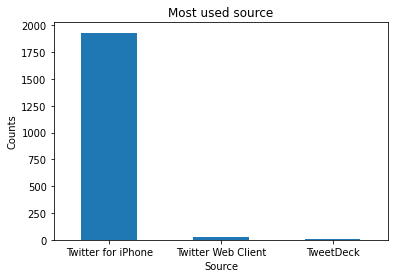

<Figure size 1080x1080 with 0 Axes>

In [75]:
#plot a bar chart that present the most used Twitter source
plot_chart(tweet_sources, 'bar', 'Most used source', 'Source', 'Counts')

> **Narrative:** _Twitter for iPhone_ is the most used twitter source

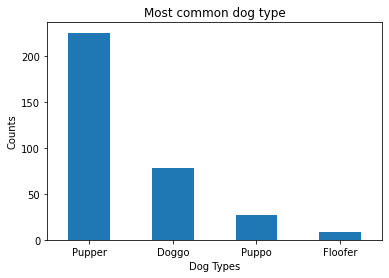

<Figure size 1080x1080 with 0 Axes>

In [76]:
#plot a bar chart that present the most common dog type
plot_chart(dog_types, 'bar', 'Most common dog type', 'Dog Types', 'Counts')

> **Narrative:** _Pupper_ is the most common dog type

<a id='references'></a>
## References
- <a href='https://pandas.pydata.org/docs/index.html'>Pandas Documentation</a>
- <a href='https://stackoverflow.com/'>Stackoverflow Community</a>